In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 数据加载，构造图
data = pd.read_csv('seealsology-data.tsv',sep = '\t')
print(data.head())
G = nx.from_pandas_edgelist(data,'source','target',edge_attr = True,create_using = nx.Graph)
#print(type(G))
#print(len(G))

           source                          target  depth
0  life insurance  corporate-owned life insurance      1
1  life insurance      critical illness insurance      1
2  life insurance                economic capital      1
3  life insurance                 estate planning      1
4  life insurance          false insurance claims      1


In [4]:
# 初始化Node2Vec模型
model = Node2Vec(G,walk_length = 10,num_walks = 5,p = 0.25,q = 4,workers =1)

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]


In [5]:
# 模型训练
result = model.fit(window =4,iter =20)

In [6]:
# 得到节点的embeddings
embeddings = result.wv
# print(embeddings.vocab)

In [7]:
# 在二维空间绘制所选节点向量
def plot_nodes(word_list):
    #获得每个节点的embdding
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(len(X))
    #降维
    pca = PCA(n_components =2)
    result = pca.fit_transform(X)
    result = result[:30]
    #print(result)
    #绘制节点向量
    plt.figure(figsize = (12,9))
    #创建一个散点图的投影
    plt.scatter(result[:,0],result[:,1])
    for i,word in enumerate(list(word_list)[:30]):
        plt.annotate(word,xy = (result[i,0],result[i,1]))
    plt.show()    

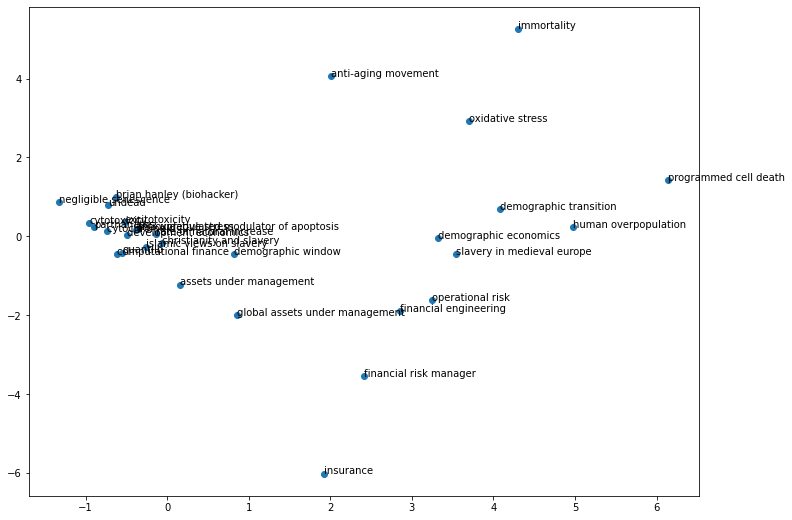

In [8]:
plot_nodes(result.wv.vocab)